In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2
from scipy import integrate

In [2]:
def Get_Histograma(data, bins):
    h, bins = np.histogram(data, bins=bins, density=True)
    w = np.diff(bins)
    m = (bins[:-1] + 0.5*w[0])

    hnorm = h/np.sum(h*w)
    return h, hnorm , m, w

In [3]:
mu, sigma = 0,2
N = 1000
normal = norm.rvs(loc = mu, scale = sigma, size = N)

In [4]:
xbins = np.linspace(np.min(normal),np.max(normal),20)
h, hnorm, m, w = Get_Histograma(normal, xbins)

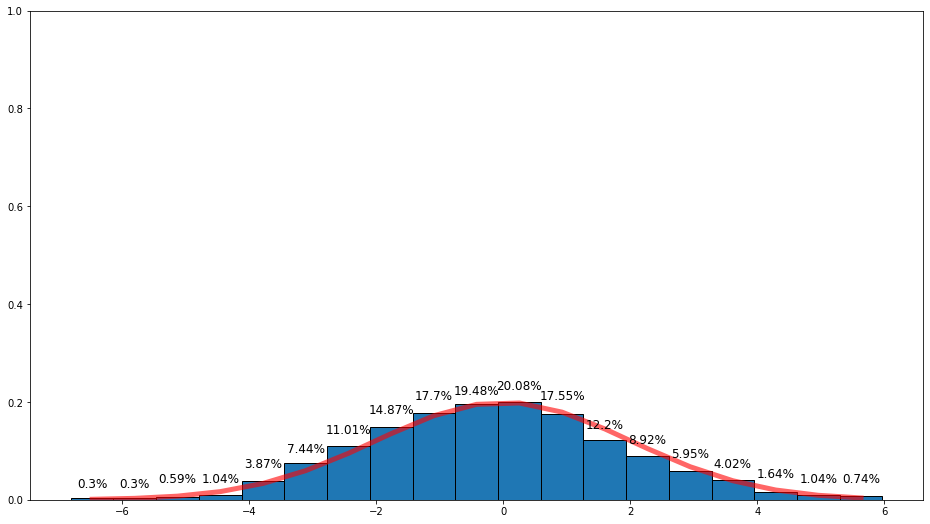

In [5]:
fig = plt.figure(figsize=(16, 9))
plt.bar(m, hnorm, width=w, align='center', ec='k')
plt.plot(m, norm.pdf(m, loc = mu, scale = sigma), 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.ylim(0, 1)

for i in range(len(h)):
    plt.text(m[i], 0.02 + np.round( hnorm[i], 2), str(np.round( hnorm[i]*100, 2)) + '%', ha='center', va='bottom', fontsize=12)

In [6]:
mean_value = integrate.simps(hnorm*m, m)
print('Media: ', mean_value)

Media:  -0.12955592698357754


In [7]:
def normalpdf(x):
    return x*norm.pdf(x, loc = mu, scale = sigma)

In [8]:
pdf_integrate = integrate.quad(normalpdf, -np.inf, np.inf)
print('Integral continua: ', pdf_integrate[0])

Integral continua:  0.0


In [9]:
def normal_variance(x):
    return (x - mean_value)**2*norm.pdf(x, loc = mu, scale = sigma)

In [10]:
variance = integrate.quad(normal_variance, -np.inf, np.inf)
print('Varianza: ', variance[0])

Varianza:  4.016784738216574
